# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yohana Nainggolan
- **Email:** nainggolanyohana30@gmail.com
- **ID Dicoding:** yohananggl

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap tingkat penggunaan sepeda?
- Bagaimana tingkat kelembaban dan kecepatan angin mempengaruhi penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
dfday= pd.read_csv("data/day.csv")
dfday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hourday = pd.read_csv('data/hour.csv')
hourday.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
dfday.duplicated().sum()

0

In [ ]:
dfday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hourday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hourday.duplicated().sum()

0

In [ ]:
hourday.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore dfday

In [ ]:
dfday.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
342,343,2011-12-09,4,0,12,0,5,1,1,0.290833,0.317542,0.695833,0.082717,261,3359,3620
85,86,2011-03-27,2,0,3,0,0,0,2,0.253043,0.250339,0.493913,0.184300,472,1221,1693
374,375,2012-01-10,1,1,1,0,2,1,1,0.308696,0.318826,0.646522,0.187552,173,3425,3598
488,489,2012-05-03,2,1,5,0,4,1,2,0.560000,0.537242,0.768333,0.133696,764,5657,6421
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786


In [ ]:
dfday.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
dfday.instant.is_unique

True

In [ ]:
dfday.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

In [ ]:
dfday.groupby(by="weathersit").casual.nunique().sort_values(ascending=False)

weathersit
1    407
2    231
3     21
Name: casual, dtype: int64

In [ ]:
dfday.groupby(by="weathersit").registered.nunique().sort_values(ascending=False)

weathersit
1    449
2    239
3     21
Name: registered, dtype: int64

### Explore hourdf

In [ ]:
hourday.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14623,14624,2012-09-06,3,1,9,12,0,4,1,2,0.72,0.6970,0.79,0.2239,11,126,137
14870,14871,2012-09-16,3,1,9,19,0,0,0,1,0.62,0.6212,0.50,0.1343,91,312,403
16453,16454,2012-11-23,4,1,11,7,0,5,1,1,0.24,0.2879,0.81,0.0000,5,72,77
16356,16357,2012-11-19,4,1,11,6,0,1,1,2,0.36,0.3333,0.66,0.2537,3,128,131
3025,3026,2011-05-10,2,0,5,23,0,2,1,2,0.52,0.5000,0.59,0.1343,9,72,81


In [ ]:
hourday.groupby(by="temp").cnt.nunique().sort_values(ascending=False)

temp
0.70    408
0.64    386
0.66    386
0.62    385
0.72    378
0.60    373
0.74    346
0.56    343
0.52    333
0.54    326
0.40    308
0.36    304
0.50    302
0.42    302
0.46    300
0.76    299
0.34    282
0.32    276
0.44    269
0.30    264
0.80    251
0.38    241
0.68    234
0.26    219
0.48    217
0.58    212
0.24    186
0.82    179
0.28    172
0.22    159
0.20    157
0.78    150
0.84    123
0.16    116
0.86    114
0.18     96
0.90     79
0.14     78
0.12     56
0.88     51
0.92     46
0.10     39
0.94     17
0.08     16
0.06     15
0.96     15
0.02     13
0.04     12
0.98      1
1.00      1
Name: cnt, dtype: int64

In [ ]:
hourday.groupby(by="windspeed").cnt.nunique().sort_values(ascending=False)

windspeed
0.1642    550
0.2239    540
0.1940    537
0.0000    534
0.1343    520
0.2537    506
0.1045    490
0.2836    472
0.0896    448
0.2985    421
0.3284    340
0.3582    299
0.3881    256
0.4179    217
0.4478    150
0.4627    127
0.4925     97
0.5224     76
0.5821     40
0.5522     35
0.6119     22
0.6418     14
0.6567     11
0.6866      5
0.7164      2
0.7463      2
0.8060      2
0.8507      2
0.7761      1
0.8358      1
Name: cnt, dtype: int64

### Explore dfday & hourday

**Menggabungkan data dfday dan hourday**

In [ ]:
dfday_hourday_df = pd.merge(
    left=dfday,
    right=hourday,
    how="inner",
    left_on="instant",
    right_on="instant"
)
dfday_hourday_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
dfday_hourday_df.groupby(by="weathersit_x").cnt_x.nunique().sort_values(ascending=False).head(10)

weathersit_x
1    451
2    243
3     21
Name: cnt_x, dtype: int64

In [ ]:
dfday_hourday_df.groupby(by="temp_x").cnt_x.nunique().sort_values(ascending=False).head(10)

temp_x
0.265833    5
0.635000    5
0.680000    4
0.710833    4
0.649167    4
0.484167    4
0.564167    4
0.437500    4
0.696667    4
0.733333    3
Name: cnt_x, dtype: int64

In [ ]:
dfday_hourday_df.groupby(by="windspeed_x").cnt_x.nunique().sort_values(ascending=False).head(10)

windspeed_x
0.106350    3
0.166667    3
0.136817    3
0.149883    3
0.110700    3
0.167912    3
0.134954    3
0.118792    3
0.228858    3
0.092054    2
Name: cnt_x, dtype: int64

### Explore all data

In [ ]:
all_df = pd.merge(
    left=dfday,
    right=hourday,
    how="inner",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
all_df.groupby(by=["temp_x", "windspeed_x", "weathersit_x"]).agg({
    "casual_y": "sum",
    "registered_y": "sum"
})

,,,casual_y,registered_y
temp_x,windspeed_x,weathersit_x,,
0.059130,0.171970,1,3,31
0.096522,0.246600,1,11,17
0.097391,0.158330,1,15,24
0.107500,0.184700,2,7,50
0.127500,0.409212,1,1,19
...,...,...,...,...
0.834167,0.165417,1,6,53
0.838333,0.174138,1,2,3
0.848333,0.133100,1,3,59


In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap tingkat penggunaan sepeda?

In [ ]:
all_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
580,581,2012-08-03,3,1,8,0,5,1,2,0.765833,...,3,1,3,0.22,0.1970,0.93,0.3284,6,35,41
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,3,1,1,0.36,0.3333,0.71,0.2985,8,95,103
266,267,2011-09-24,4,0,9,0,6,0,2,0.606667,...,3,1,1,0.22,0.1970,0.44,0.3582,0,49,49
148,149,2011-05-29,2,0,5,0,0,0,1,0.667500,...,5,1,2,0.20,0.1970,0.40,0.2239,19,48,67
655,656,2012-10-17,4,1,10,0,3,1,1,0.455833,...,0,0,1,0.30,0.3333,0.56,0.0000,14,95,109


<ipython-input-37-9943abfcf58e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather, x='weathersit_x', y='cnt_y', palette='viridis')


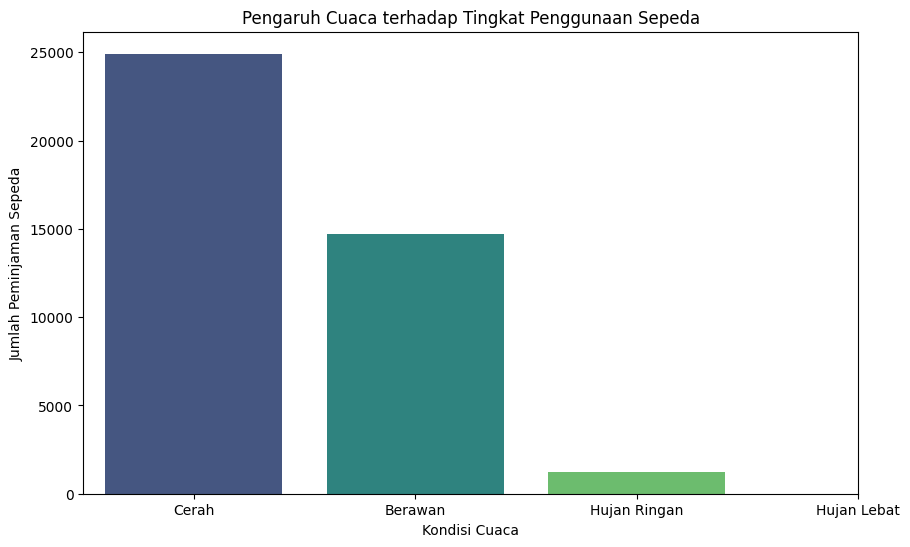

In [ ]:
weather = all_df.groupby('weathersit_x')['cnt_y'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=weather, x='weathersit_x', y='cnt_y', palette='viridis')

plt.title('Pengaruh Cuaca terhadap Tingkat Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat'])

plt.show()

Visualisasi ini akan memberikan pemahaman yang lebih baik tentang bagaimana tingkat penggunaan sepeda berbagi dipengaruhi oleh kondisi cuaca yang berbeda. Misalnya, apakah jumlah peminjaman sepeda cenderung lebih rendah saat cuaca buruk atau apakah cuaca yang cerah mempengaruhi peningkatan peminjaman sepeda.

<ipython-input-38-f9d2401abeb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='weathersit_x', y='cnt_y', palette='viridis')


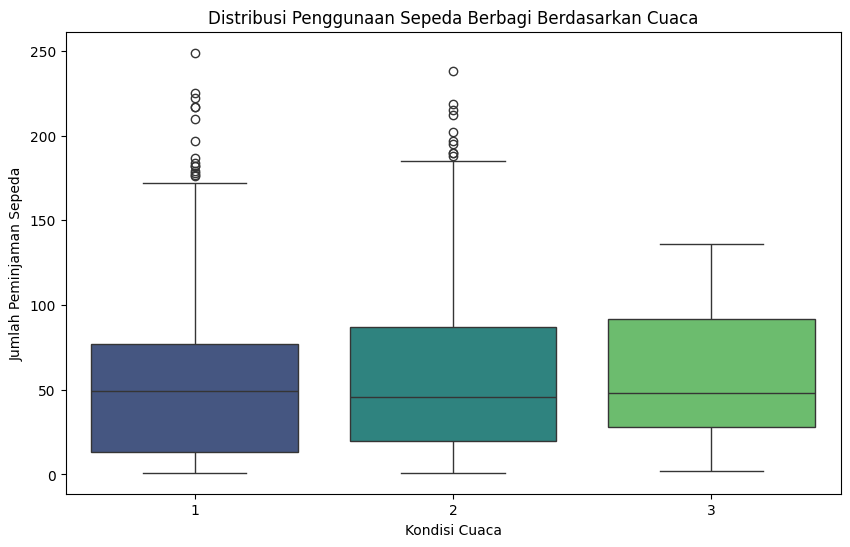

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_df, x='weathersit_x', y='cnt_y', palette='viridis')

plt.title('Distribusi Penggunaan Sepeda Berbagi Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.show()


### Pertanyaan 2: Bagaimana tingkat kelembaban dan kecepatan angin mempengaruhi penggunaan sepeda?

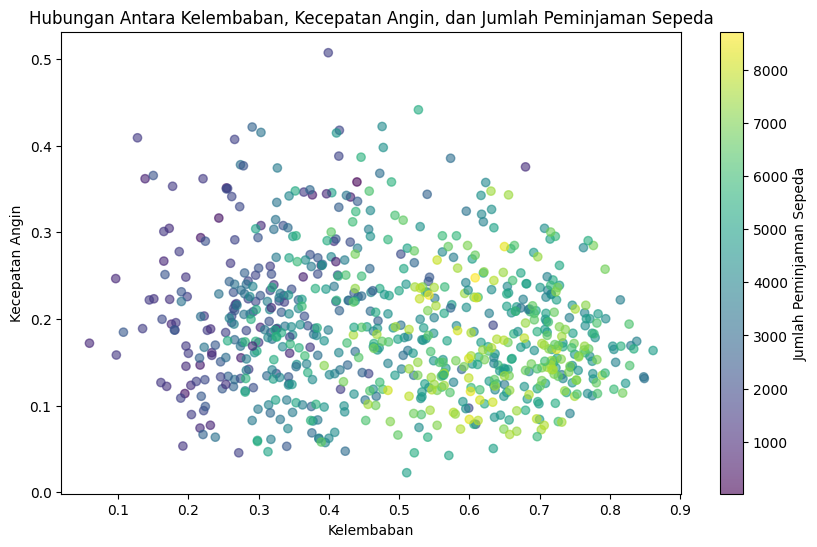

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(all_df['temp_x'], all_df['windspeed_x'], c=all_df['cnt_x'], cmap='viridis', alpha=0.6)

plt.title('Hubungan Antara Kelembaban, Kecepatan Angin, dan Jumlah Peminjaman Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Kecepatan Angin')
plt.colorbar(label='Jumlah Peminjaman Sepeda')

plt.show()

Sumbu x menunjukkan tingkat kelembaban, sumbu y menunjukkan kecepatan angin, dan warna atau ukuran titik-titik menunjukkan jumlah peminjaman sepeda. Dengan melihat pola distribusi titik-titik, Anda dapat mengeksplorasi hubungan antara tingkat kelembaban dan kecepatan angin dengan penggunaan sepeda. Misalnya, Anda dapat melihat apakah ada tren atau pola tertentu yang muncul ketika tingkat kelembaban atau kecepatan angin berubah.

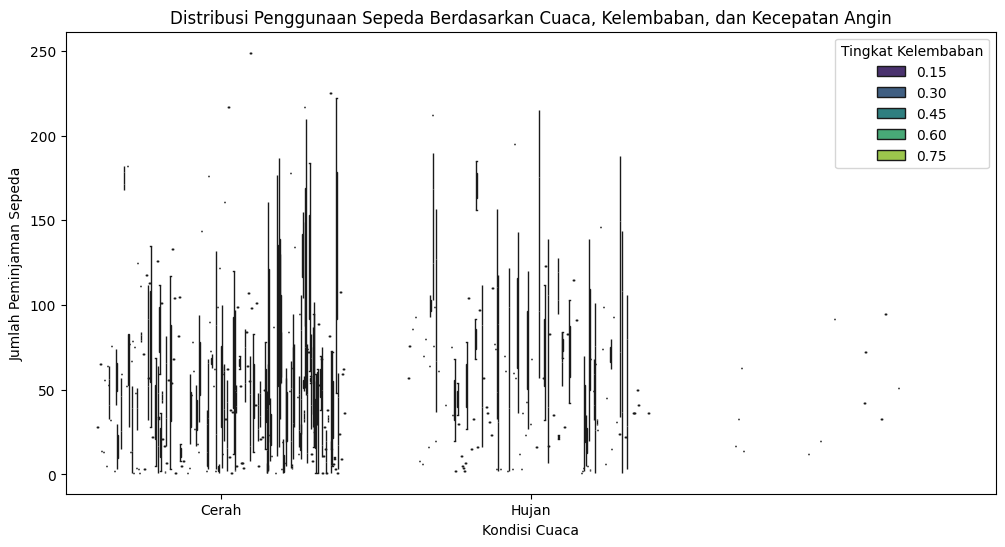

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=all_df, x='weathersit_x', y='cnt_y', hue='temp_x', palette='viridis')

plt.title('Distribusi Penggunaan Sepeda Berdasarkan Cuaca, Kelembaban, dan Kecepatan Angin')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Tingkat Kelembaban')
plt.xticks(ticks=[0, 1], labels=['Cerah', 'Hujan'])

plt.show()

## Conclusion

- Conclution pertanyaan 1
Pengaruh cuaca terhadap penggunaan sepeda ialah semakin bagus keadaan cuaca atau semakin cerah maka penggunaan sepeda semakin meningkat, dan jika hujan lebat maka penggunakan sepeda berkurang.
- Conclution pertanyaan 2
Sebagian besar titik-titik tersebar merata di seluruh rentang nilai kelembaban, menunjukkan bahwa tingkat kelembaban tidak memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.
Sebagian besar titik-titik juga tersebar merata di seluruh rentang nilai kecepatan angin, menunjukkan bahwa kecepatan angin tidak memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.
